---
# EDA - COVID-19 ARGENTINA
---

In [1]:
import os
import datadotworld as dw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from pylab import rcParams

In [2]:
os.environ['DW_AUTH_TOKEN'] = ''

In [3]:
dataset = 'vlasvlasvlas/covid-19-argentina-data'

In [4]:
query = 'SELECT fecha, dia_inicio FROM covid19ardata_historico LIMIT 100'

In [5]:
df = dw.query(dataset, query).dataframe
df

,fecha,dia_inicio
0,2020-03-02,1
1,2020-03-03,2
2,2020-03-04,3
3,2020-03-05,4
4,2020-03-06,5
...,...,...
95,2020-03-24,20
96,2020-03-24,20
97,2020-03-24,20
98,2020-03-24,20


In [6]:
test_0 = 'SELECT * FROM covid19ardata_historico LIMIT 100'
test_1 = dw.query(dataset, test_0).dataframe

In [7]:
test_1.head(5)

,fecha,dia_inicio,dia_cuarentena_dnu260,osm_admin_level_2,osm_admin_level_4,osm_admin_level_8,tot_casosconf,nue_casosconf_diff,tot_fallecidos,nue_fallecidos_diff,tot_recuperados,tot_terapia,test_rt_pcr_negativos,test_rt_pcr_total,transmision_tipo,informe_tipo,informe_link,observacion,covid19argentina_admin_level_4
0,2020-03-02,1,None,Argentina,CABA,None,1,1,0,0,None,None,None,None,importado,None,https://www.infobae.com/coronavirus/2020/03/03...,no hay informe,capital-federal
1,2020-03-03,2,None,Argentina,Indeterminado,None,1,0,0,0,None,None,None,None,importado,None,None,no hay informe,no-data
2,2020-03-04,3,None,Argentina,Indeterminado,None,1,0,0,0,None,None,None,None,importado,None,None,no hay informe,no-data
3,2020-03-09,8,None,Argentina,CABA,None,11,1,3,1,None,None,None,None,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,capital-federal
4,2020-03-09,8,None,Argentina,San Luis,None,13,2,3,0,None,None,None,None,importado,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,san-luis


In [8]:
test_1.tail()

,fecha,dia_inicio,dia_cuarentena_dnu260,osm_admin_level_2,osm_admin_level_4,osm_admin_level_8,tot_casosconf,nue_casosconf_diff,tot_fallecidos,nue_fallecidos_diff,tot_recuperados,tot_terapia,test_rt_pcr_negativos,test_rt_pcr_total,transmision_tipo,informe_tipo,informe_link,observacion,covid19argentina_admin_level_4
95,2020-03-24,20,4,Argentina,Santa Fe,Rafaela,383,1,10,0,None,None,None,None,transmision comunitaria,informe provincial,https://www.santafe.gob.ar/index.php/web/conte...,Santa Fe Parte Provincial no son novedades son...,santa-fe
96,2020-03-24,20,4,Argentina,Santa Fe,Roldán,384,1,10,0,None,None,None,None,transmision comunitaria,informe provincial,https://www.santafe.gob.ar/index.php/web/conte...,Santa Fe Parte Provincial no son novedades son...,santa-fe
97,2020-03-24,20,4,Argentina,La Pampa,None,385,1,10,0,None,None,None,None,transmision comunitaria,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,la-pampa
98,2020-03-24,20,4,Argentina,Neuquén,None,386,1,10,0,None,None,None,None,transmision comunitaria,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,neuquen
99,2020-03-24,20,4,Argentina,Santa Cruz,None,387,1,10,0,None,None,None,None,transmision comunitaria,informe nacional,https://www.argentina.gob.ar/sites/default/fil...,None,santa-cruz


In [9]:
test_1.columns

Index(['fecha', 'dia_inicio', 'dia_cuarentena_dnu260', 'osm_admin_level_2',
       'osm_admin_level_4', 'osm_admin_level_8', 'tot_casosconf',
       'nue_casosconf_diff', 'tot_fallecidos', 'nue_fallecidos_diff',
       'tot_recuperados', 'tot_terapia', 'test_rt_pcr_negativos',
       'test_rt_pcr_total', 'transmision_tipo', 'informe_tipo', 'informe_link',
       'observacion', 'covid19argentina_admin_level_4'],
      dtype='object')

In [10]:
for i in test_1.columns:
    print(i)

fecha
dia_inicio
dia_cuarentena_dnu260
osm_admin_level_2
osm_admin_level_4
osm_admin_level_8
tot_casosconf
nue_casosconf_diff
tot_fallecidos
nue_fallecidos_diff
tot_recuperados
tot_terapia
test_rt_pcr_negativos
test_rt_pcr_total
transmision_tipo
informe_tipo
informe_link
observacion
covid19argentina_admin_level_4


In [11]:
data_select = '''
SELECT
    fecha, 
    dia_inicio, 
    dia_cuarentena_dnu260 as dia_cuarentena,
    osm_admin_level_4 as provincia, 
    osm_admin_level_8 as ciudad, 
    tot_casosconf,
    nue_casosconf_diff, 
    tot_fallecidos, 
    nue_fallecidos_diff,
    tot_recuperados, 
    tot_terapia, 
    test_rt_pcr_negativos,
    test_rt_pcr_total, 
    transmision_tipo, 
    informe_tipo, 
    informe_link, 
    covid19argentina_admin_level_4
FROM covid19ardata_historico
'''

In [12]:
results = dw.query(dataset, data_select)

In [13]:
df = results.dataframe

In [14]:
df_backup = results.dataframe

In [15]:
df_backup.to_csv('df_backup.csv', index=False)

In [16]:
df = pd.read_csv('df_backup.csv')

In [17]:
df.shape

(13967, 17)

In [18]:
df = df.fillna(0)
df = df.astype({'provincia': str, 'ciudad': str})
df = df.astype({'tot_casosconf': int,'tot_fallecidos': int,'dia_cuarentena': int, 'tot_casosconf': int})
df.dtypes

fecha                              object
dia_inicio                          int64
dia_cuarentena                      int32
provincia                          object
ciudad                             object
tot_casosconf                       int32
nue_casosconf_diff                float64
tot_fallecidos                      int32
nue_fallecidos_diff               float64
tot_recuperados                    object
tot_terapia                        object
test_rt_pcr_negativos             float64
test_rt_pcr_total                 float64
transmision_tipo                   object
informe_tipo                       object
informe_link                       object
covid19argentina_admin_level_4     object
dtype: object

---
## CASOS CONFIRMADOS Y CASOS FALLECIDOS POR FECHA
---

C:\Users\Usuario\anaconda3\envs\covid_19\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning:

FixedFormatter should only be used together with FixedLocator



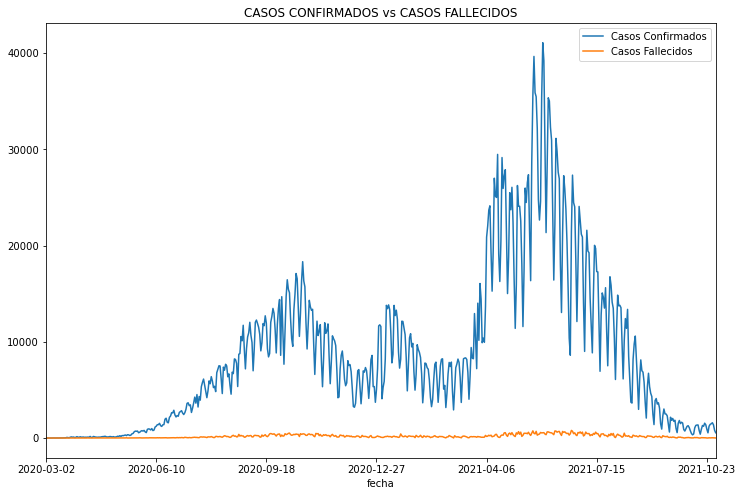

In [19]:
df_temp = df[(df["nue_fallecidos_diff"]<3000) & (df["nue_fallecidos_diff"]>=0)].copy()
df_to_plot = df_temp.groupby("fecha")[["nue_casosconf_diff", "nue_fallecidos_diff"]].sum()
df_to_plot.plot(figsize=(12, 8), title='CASOS CONFIRMADOS vs CASOS FALLECIDOS')
plt.legend(['Casos Confirmados','Casos Fallecidos'])
plt.show()

---
## CASOS CONFIRMADOS Y CASOS FALLECIDOS POR FECHA
### Comparacion realizada a misma escala
---

C:\Users\Usuario\anaconda3\envs\covid_19\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning:

FixedFormatter should only be used together with FixedLocator



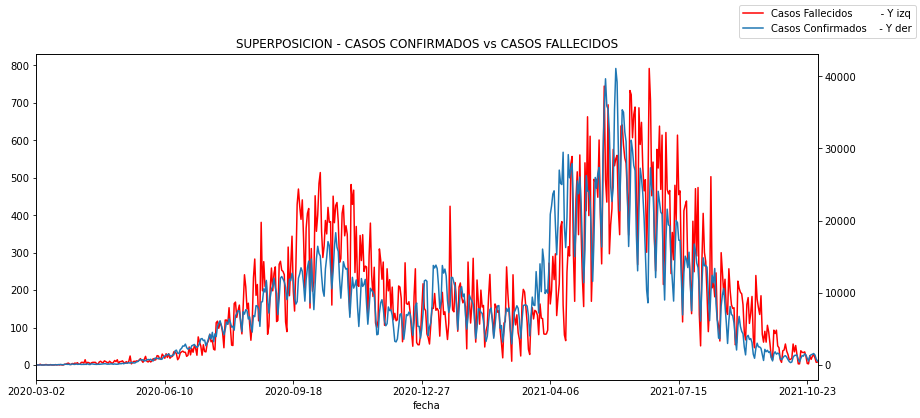

In [20]:
ax = df_to_plot.plot(y="nue_fallecidos_diff", legend=False, figsize=(14, 6), color="r", title='SUPERPOSICION - CASOS CONFIRMADOS vs CASOS FALLECIDOS')
ax2 = ax.twinx()
df_to_plot.plot(y="nue_casosconf_diff", ax=ax2, legend=False)
ax.figure.legend(['Casos Fallecidos         - Y izq','Casos Confirmados    - Y der'])
plt.show()

---
## CANTIDAD DE CASOS FALLECIDOS POR PROVINCIA
---

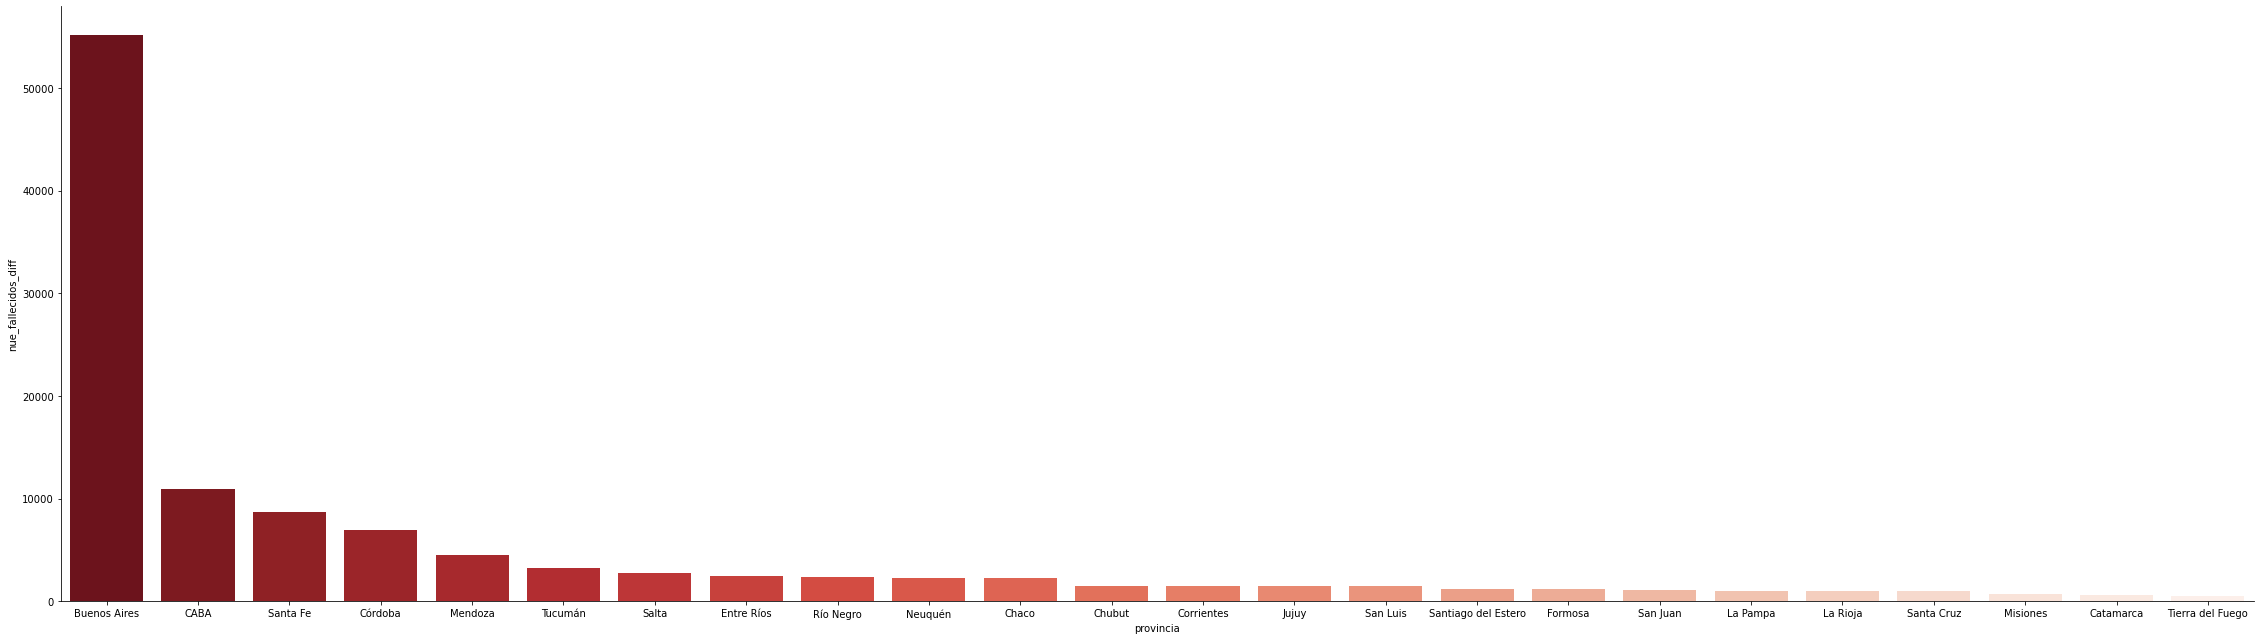

In [21]:
df_temp = df[df.provincia != "Indeterminado"].copy()
provincia = df_temp.groupby("provincia")[["nue_fallecidos_diff"]].sum()
df_to_plot = provincia.reset_index().sort_values(['nue_fallecidos_diff'], ascending=[False])
g = sns.catplot(x='provincia', y='nue_fallecidos_diff', 
                data=df_to_plot, 
                kind='bar', palette="Reds_r", 
                height=9, aspect=3.5)

---
## CANTIDAD DE CASOS CONFIRMADOS POR PROVINCIA
---

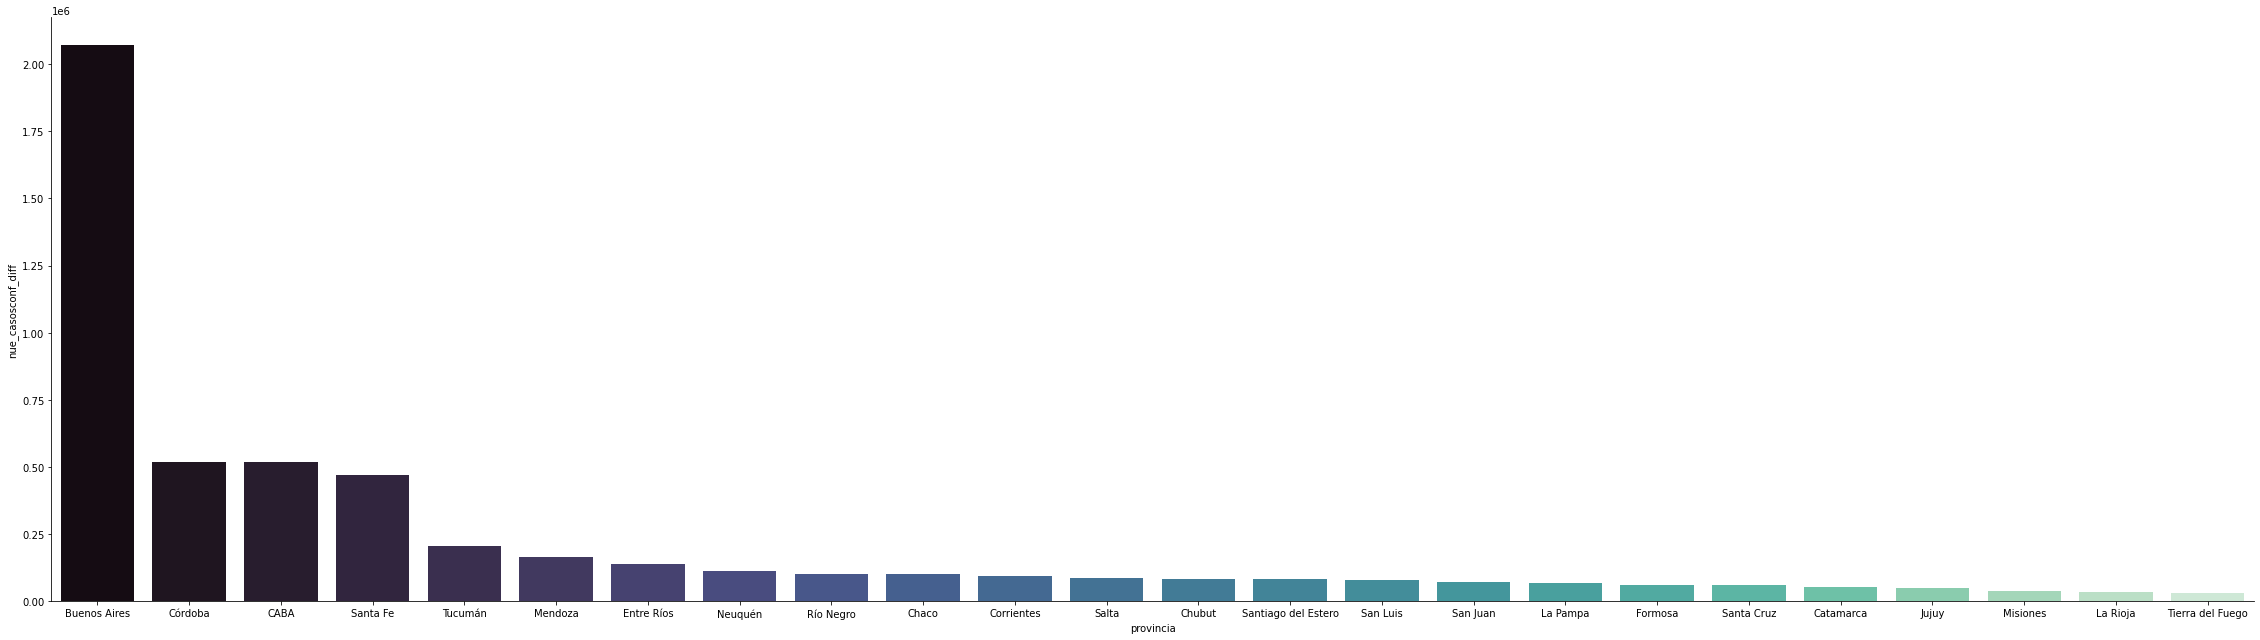

In [22]:
df_temp = df[df.provincia != "Indeterminado"].copy()
provincia = df_temp.groupby("provincia")[["nue_casosconf_diff"]].sum()
df_to_plot = provincia.reset_index().sort_values(['nue_casosconf_diff'], ascending=[False])
sns.color_palette("mako")
g = sns.catplot(x='provincia', y='nue_casosconf_diff', 
                data=df_to_plot, 
                kind='bar', palette="mako",
                height=9, aspect=3.5)

In [23]:
map_df = gpd.read_file("C:/Users/Usuario/Desktop/provincias/provincia.shp")
map_df.head()

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,globalid,...,escala,created_us,created_da,last_edite,last_edi_1,globalid_1,provincia_,shape_star,shape_stle,geometry
0,1,16251.0,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{4DBCF6F2-AF73-40A1-8634-02EB47B82700},1.0,0.020242,0.743806,POLYGON ((-58.34188739699994 -34.6310967159999...
1,2,16252.0,0,Provincia,Provincia del Neuquén,Provincia,Neuquén,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{1F58EF44-45EE-4C10-A683-CC3AE303A25B},1.0,9.771811,21.515984,POLYGON ((-68.24999999999994 -37.5747846389999...
2,3,16253.0,0,Provincia,Provincia de San Luis,Provincia,San Luis,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{D897577B-8EC5-4997-9CBD-0EBED84DE504},1.0,7.333771,14.490196,POLYGON ((-66.66178829699999 -31.9205360279999...
3,4,16254.0,0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{CE0E514A-EB01-4672-868D-5C822F9CA370},1.0,12.552838,20.852280,POLYGON ((-58.88082187799995 -28.0668248809999...
4,5,16255.0,0,Provincia,Provincia de La Rioja,Provincia,La Rioja,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{9D0FC6AF-9575-4EF8-9BED-6BF6C0045B90},1.0,8.529216,16.426132,POLYGON ((-65.42298521599997 -30.1196024849999...


In [24]:
map_df.nam = map_df.nam.str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(' ', '').str.replace('ciudadautonomadebuenosaires', 'caba')
map_df.head()

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,globalid,...,escala,created_us,created_da,last_edite,last_edi_1,globalid_1,provincia_,shape_star,shape_stle,geometry
0,1,16251.0,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,caba,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{4DBCF6F2-AF73-40A1-8634-02EB47B82700},1.0,0.020242,0.743806,POLYGON ((-58.34188739699994 -34.6310967159999...
1,2,16252.0,0,Provincia,Provincia del Neuquén,Provincia,neuquen,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{1F58EF44-45EE-4C10-A683-CC3AE303A25B},1.0,9.771811,21.515984,POLYGON ((-68.24999999999994 -37.5747846389999...
2,3,16253.0,0,Provincia,Provincia de San Luis,Provincia,sanluis,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{D897577B-8EC5-4997-9CBD-0EBED84DE504},1.0,7.333771,14.490196,POLYGON ((-66.66178829699999 -31.9205360279999...
3,4,16254.0,0,Provincia,Provincia de Santa Fe,Provincia,santafe,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{CE0E514A-EB01-4672-868D-5C822F9CA370},1.0,12.552838,20.852280,POLYGON ((-58.88082187799995 -28.0668248809999...
4,5,16255.0,0,Provincia,Provincia de La Rioja,Provincia,larioja,IGN,6.0,None,...,0.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{9D0FC6AF-9575-4EF8-9BED-6BF6C0045B90},1.0,8.529216,16.426132,POLYGON ((-65.42298521599997 -30.1196024849999...


In [25]:
df_temp = df[df.provincia != "Indeterminado"].copy()
provincia = df_temp.groupby("provincia")[["nue_fallecidos_diff"]].sum()
df_to_plot = provincia.reset_index().sort_values(['nue_fallecidos_diff'], ascending=[False])
df_to_plot.provincia = df_to_plot.provincia.str.replace(' ', '').str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_to_plot.head()

,provincia,nue_fallecidos_diff
0,buenosaires,55170.0
1,caba,10975.0
20,santafe,8707.0
6,cordoba,6932.0
12,mendoza,4552.0


In [26]:
provincia = df_temp.groupby("provincia")[["nue_fallecidos_diff", 'nue_casosconf_diff']].sum()

In [27]:
provincia['porcent'] = provincia['nue_fallecidos_diff']/provincia['nue_casosconf_diff'] * 100
provincia

,nue_fallecidos_diff,nue_casosconf_diff,porcent
provincia,,,
Buenos Aires,55170.0,2070802.0,2.664185
CABA,10975.0,517578.0,2.120453
Catamarca,578.0,51603.0,1.120090
Chaco,2290.0,100481.0,2.279038
Chubut,1534.0,83554.0,1.835938
Corrientes,1529.0,95037.0,1.608847
Córdoba,6932.0,518140.0,1.337862
Entre Ríos,2454.0,137095.0,1.790000
Formosa,1193.0,62156.0,1.919364


In [28]:
provincia = provincia.reset_index()

In [29]:
provincia['provincia'] = provincia['provincia'].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace('ciudadautonomadebuenosaires', 'caba').str.replace(' ', '')

In [30]:
df = map_df.merge(provincia, left_on="nam", right_on="provincia", how="left")
df.head()

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,globalid,...,last_edi_1,globalid_1,provincia_,shape_star,shape_stle,geometry,provincia,nue_fallecidos_diff,nue_casosconf_diff,porcent
0,1,16251.0,0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,caba,IGN,6.0,None,...,2021-07-21,{4DBCF6F2-AF73-40A1-8634-02EB47B82700},1.0,0.020242,0.743806,POLYGON ((-58.34188739699994 -34.6310967159999...,caba,10975.0,517578.0,2.120453
1,2,16252.0,0,Provincia,Provincia del Neuquén,Provincia,neuquen,IGN,6.0,None,...,2021-07-21,{1F58EF44-45EE-4C10-A683-CC3AE303A25B},1.0,9.771811,21.515984,POLYGON ((-68.24999999999994 -37.5747846389999...,neuquen,2304.0,113778.0,2.024996
2,3,16253.0,0,Provincia,Provincia de San Luis,Provincia,sanluis,IGN,6.0,None,...,2021-07-21,{D897577B-8EC5-4997-9CBD-0EBED84DE504},1.0,7.333771,14.490196,POLYGON ((-66.66178829699999 -31.9205360279999...,sanluis,1448.0,80531.0,1.798065
3,4,16254.0,0,Provincia,Provincia de Santa Fe,Provincia,santafe,IGN,6.0,None,...,2021-07-21,{CE0E514A-EB01-4672-868D-5C822F9CA370},1.0,12.552838,20.852280,POLYGON ((-58.88082187799995 -28.0668248809999...,santafe,8707.0,470300.0,1.851371
4,5,16255.0,0,Provincia,Provincia de La Rioja,Provincia,larioja,IGN,6.0,None,...,2021-07-21,{9D0FC6AF-9575-4EF8-9BED-6BF6C0045B90},1.0,8.529216,16.426132,POLYGON ((-65.42298521599997 -30.1196024849999...,larioja,994.0,33733.0,2.946669


In [31]:
df = df[~df['nam'].isin(['tierradelfuego,antartidaeislasdelatlanticosur'])].copy()

In [32]:
df['nue_casosconf_diff'] = df['nue_casosconf_diff'].fillna(0)
df['nue_fallecidos_diff'] = df['nue_fallecidos_diff'].fillna(0)
df['porcent'] = df['porcent'].fillna(0)

---
## CANTIDAD DE CASOS CONFIRMADOS POR PROVINCIA
---

<AxesSubplot:>

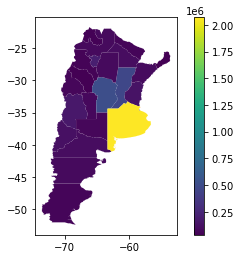

In [33]:
fig, ax = plt.subplots(1,1)
rcParams['figure.figsize'] = 10, 20

df.plot(column='nue_casosconf_diff', ax=ax, legend=True)


---
## CANTIDAD DE CASOS FALLECIDOS POR PROVINCIA
---

<AxesSubplot:>

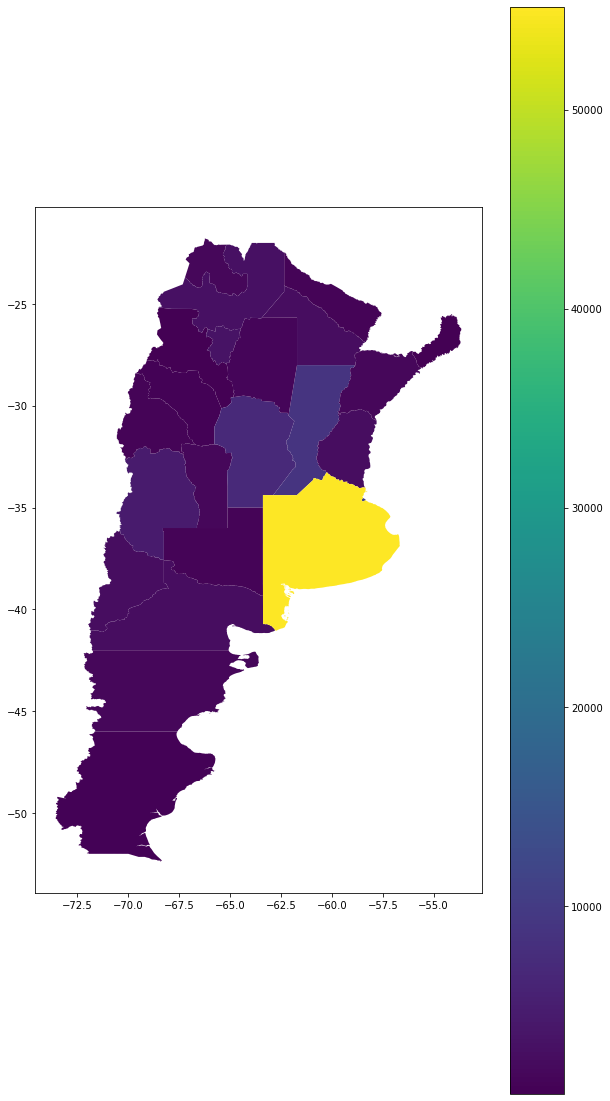

In [34]:
fig, ax = plt.subplots(1,1)
rcParams['figure.figsize'] = 10, 20

df.plot(column='nue_fallecidos_diff', ax=ax, legend=True)

---
## PORCENTAJE DE FALLECIDOS POR CANTIDAD DE CONFIRMADOS POR PROVINCIA
---

<AxesSubplot:>

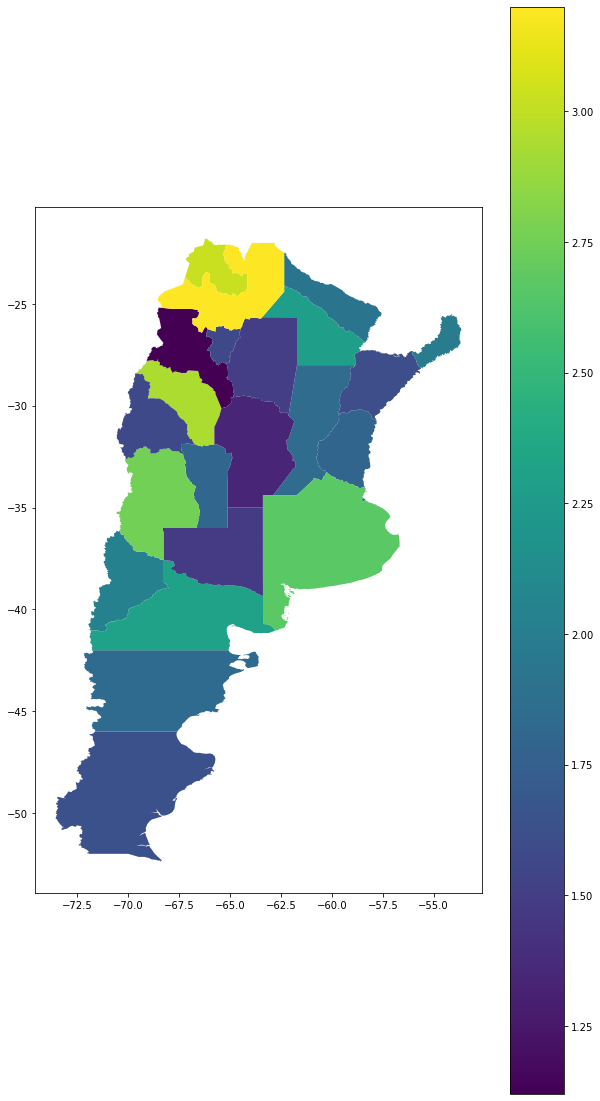

In [35]:
fig, ax = plt.subplots(1,1)
rcParams['figure.figsize'] = 10, 20

df.plot(column='porcent', ax=ax, legend=True)

---
## PORCENTAJE DE FALLECIDOS POR CANTIDAD DE CONFIRMADOS POR PROVINCIA
---

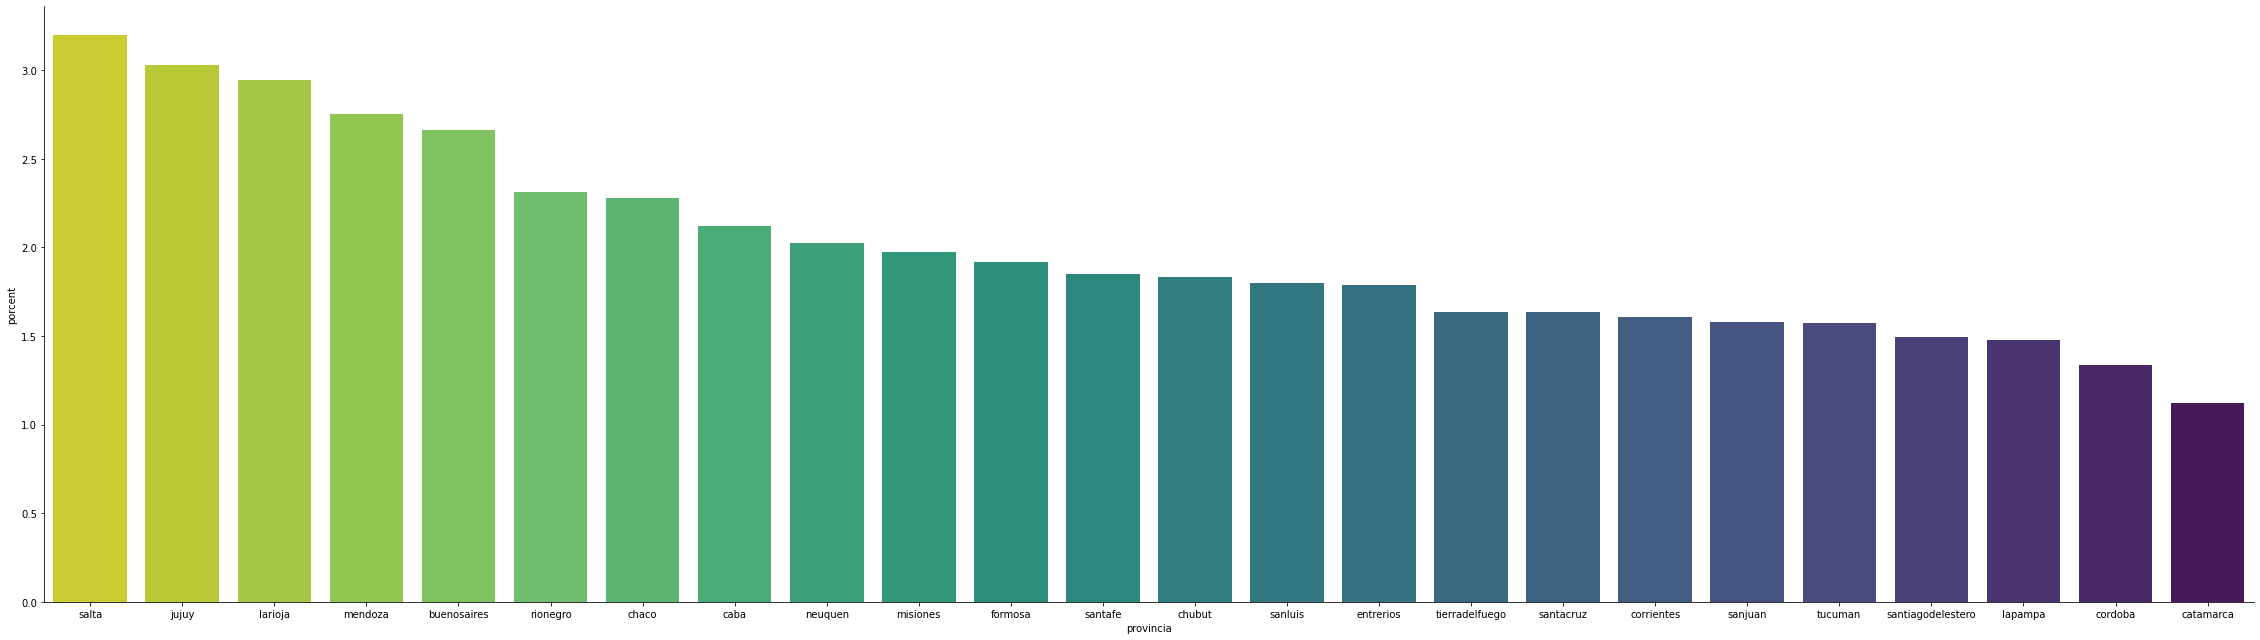

In [36]:
df = df.copy()
df = provincia.reset_index().sort_values(['porcent'], ascending=[False])
g = sns.catplot(x='provincia', y='porcent', 
                data=df, 
                kind='bar', palette="viridis_r", 
                height=9, aspect=3.5)